In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
train <- read.csv('titanic_train.csv')
test <- read.csv('titanic_test.csv')
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


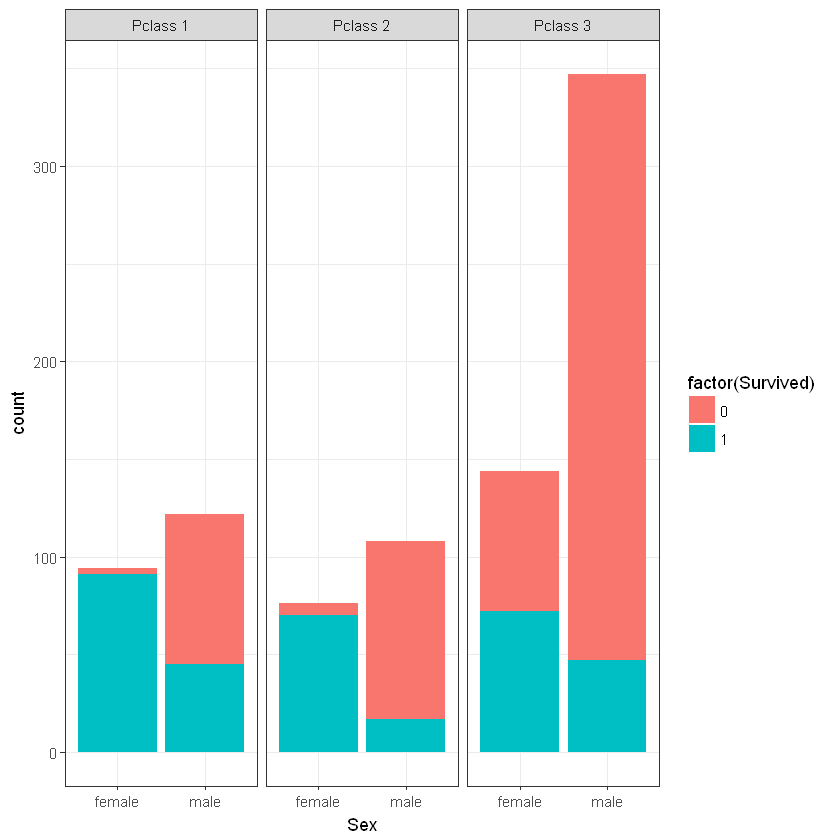

In [3]:
ggplot(train, aes(Sex)) + 
    geom_bar(aes(fill=factor(Survived))) + 
    theme_bw() + 
    facet_grid(. ~ Pclass, labeller = as_labeller(c('1'='Pclass 1','2'='Pclass 2','3'='Pclass 3')))

In [4]:
test$Survived <- NA
total <- rbind(train, test)
str(total)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [5]:
summary(total$Embarked)

C   Q   S 
  2 270 123 914

In [6]:
total[total$Embarked == '',]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

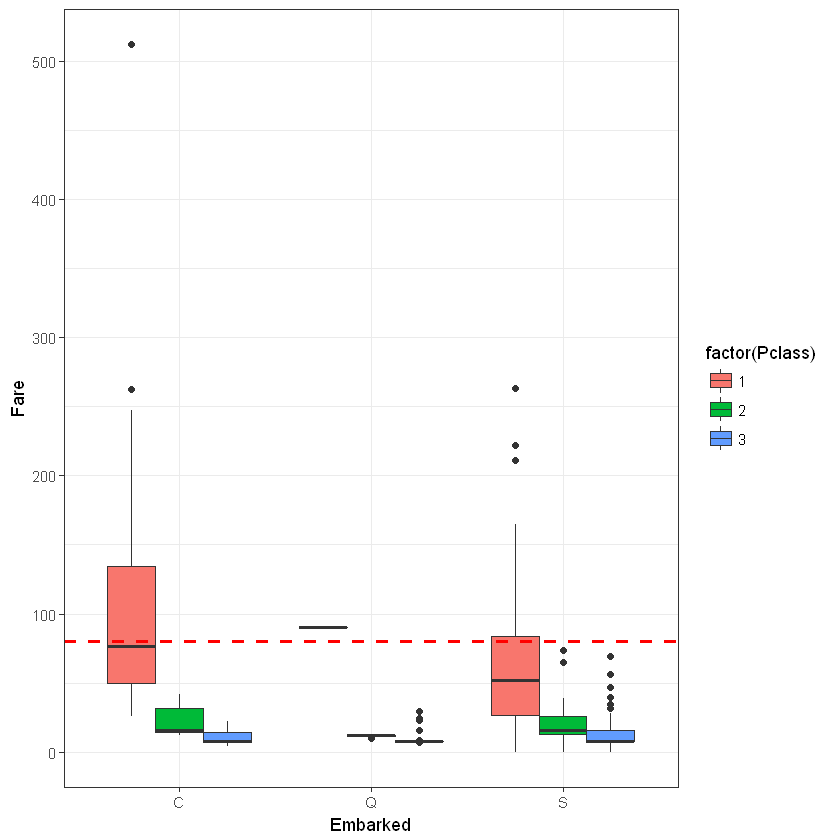

In [7]:
ggplot(total[total$Embarked != '',], aes(Embarked, Fare, fill = factor(Pclass))) +
    geom_boxplot() +
    geom_hline(aes(yintercept=80), colour='red', linetype='dashed', lwd=1) +
    theme_bw()

In [8]:
# Since both fare=$80 and Pclass=1, they most likely embarked from 'C'
total$Embarked[c(62, 830)] <- 'C'
filter(total, PassengerId == 62 | PassengerId == 830)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,C


In [9]:
total$Embarked <- factor(total$Embarked)
summary(total$Embarked)

C   Q   S 
272 123 914

In [10]:
summary(total$Fare)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.450  33.300  31.280 512.300       1 

In [11]:
total[is.na(total$Fare),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S


Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

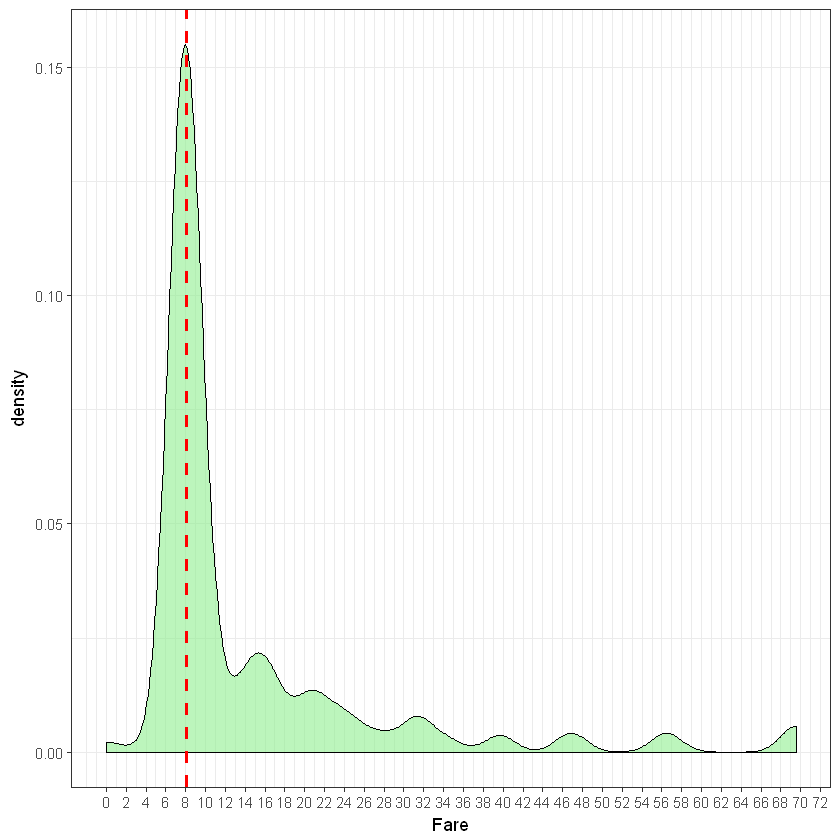

In [12]:
ggplot(total[total$Pclass == '3' & total$Embarked == 'S',], aes(Fare)) +
    geom_density(fill='lightgreen', alpha=0.6) + 
    geom_vline(aes(xintercept=median(Fare, na.rm=T)),
    colour='red', linetype='dashed', lwd=1) +
    scale_x_continuous(breaks = seq(0, 80, by = 2)) +
    theme_bw()

In [13]:
# Replace missing fare value with median fare for Pclass=3 and Embarked='S'
total$Fare[1044] <- median(total[total$Pclass == '3' & total$Embarked == 'S', ]$Fare, na.rm = TRUE)
filter(total, PassengerId == 1044)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,,S


In [14]:
summary(total$Fare)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.896  14.450  33.280  31.280 512.300 

In [15]:
# Feature engineering 1: add Title
total$Name <- as.character(total$Name)
total$Title <- sapply(total$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][2]})
total$Title <- sub(' ', '', total$Title)

In [16]:
table(total$Title)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

In [17]:
total$Title[total$Title %in% c('Mme', 'Mlle')] <- 'Mlle'
total$Title[total$Title %in% c('Capt', 'Don', 'Major', 'Sir')] <- 'Sir'
total$Title[total$Title %in% c('Dona', 'Lady', 'the Countess', 'Jonkheer')] <- 'Lady'
total$Title <- factor(total$Title)

In [18]:
table(total$Title)


   Col     Dr   Lady Master   Miss   Mlle     Mr    Mrs     Ms    Rev    Sir 
     4      8      4     61    260      3    757    197      2      8      5 

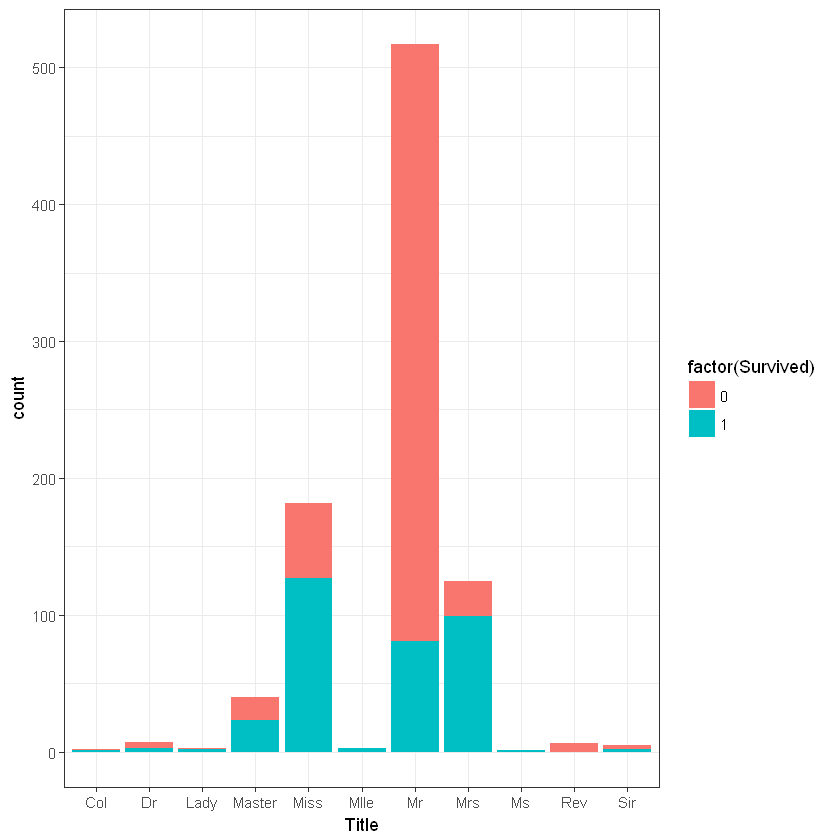

In [19]:
ggplot(total[1:891,], aes(Title)) + geom_bar(aes(fill=factor(Survived))) + theme_bw()

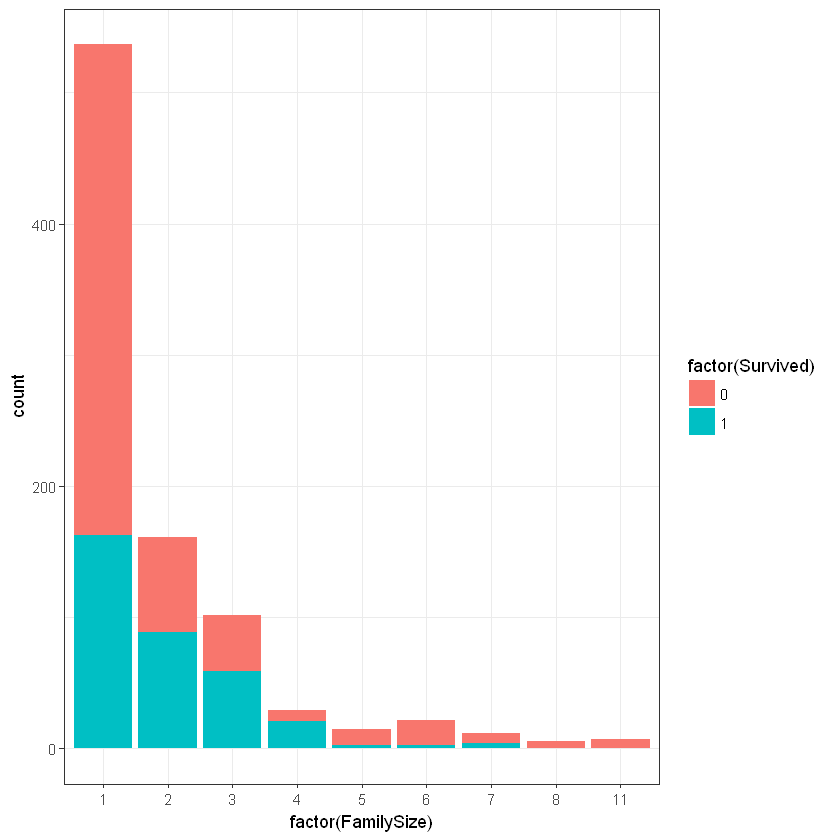

In [20]:
# Feature engineering 2: add FamilySize
total$FamilySize <- total$SibSp + total$Parch + 1
ggplot(total[1:891,], aes(factor(FamilySize))) + geom_bar(aes(fill=factor(Survived))) + theme_bw()

In [21]:
# Feature engineering 3: add FamilyID
total$Surname <- sapply(total$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][1]})
total$FamilyID <- paste(as.character(total$FamilySize), total$Surname, sep="")
total$FamilyID[total$FamilySize <= 2] <- 'Small'
table(total$FamilyID)


           11Sage           3Abbott         3Appleton         3Beckwith 
               11                 3                 1                 2 
          3Boulos           3Bourke            3Brown         3Caldwell 
                3                 3                 4                 3 
         3Christy          3Collyer          3Compton          3Cornell 
                2                 3                 3                 1 
          3Coutts           3Crosby           3Danbom           3Davies 
                3                 3                 3                 5 
           3Dodge          3Douglas             3Drew            3Elias 
                3                 1                 3                 3 
      3Frauenthal        3Frolicher 3Frolicher-Stehli        3Goldsmith 
                1                 1                 2                 3 
      3Gustafsson       3Hamalainen           3Hansen             3Hart 
                2                 2               

In [22]:
famIDs <- data.frame(table(total$FamilyID))
head(famIDs)

Var1,Freq
11Sage,11
3Abbott,3
3Appleton,1
3Beckwith,2
3Boulos,3
3Bourke,3


In [23]:
famIDs <- famIDs[famIDs$Freq <= 2,]
total$FamilyID[total$FamilyID %in% famIDs$Var1] <- 'Small'
total$FamilyID <- factor(total$FamilyID)
table(total$FamilyID)


       11Sage       3Abbott       3Boulos       3Bourke        3Brown 
           11             3             3             3             4 
    3Caldwell      3Collyer      3Compton       3Coutts       3Crosby 
            3             3             3             3             3 
      3Danbom       3Davies        3Dodge         3Drew        3Elias 
            3             5             3             3             3 
   3Goldsmith         3Hart      3Hickman      3Johnson       3Klasen 
            3             3             3             3             3 
      3Mallet        3McCoy     3Moubarek        3Nakid     3Navratil 
            3             3             3             3             3 
     3Peacock        3Peter        3Quick      3Rosblom       3Samaan 
            3             3             3             3             3 
   3Sandstrom      3Spedden      3Taussig       3Thayer        3Touma 
            3             3             3             3             3 
3van 

In [24]:
str(total)

'data.frame':	1309 obs. of  16 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ Title      : Factor w/ 11 levels "Col","Dr","Lady",..: 7 8 5 8 7 7 7 4 8 8 ...
 $ FamilySize : num  2 2 1 2 1 1 1 

In [25]:
summary(total$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.88   39.00   80.00     263 

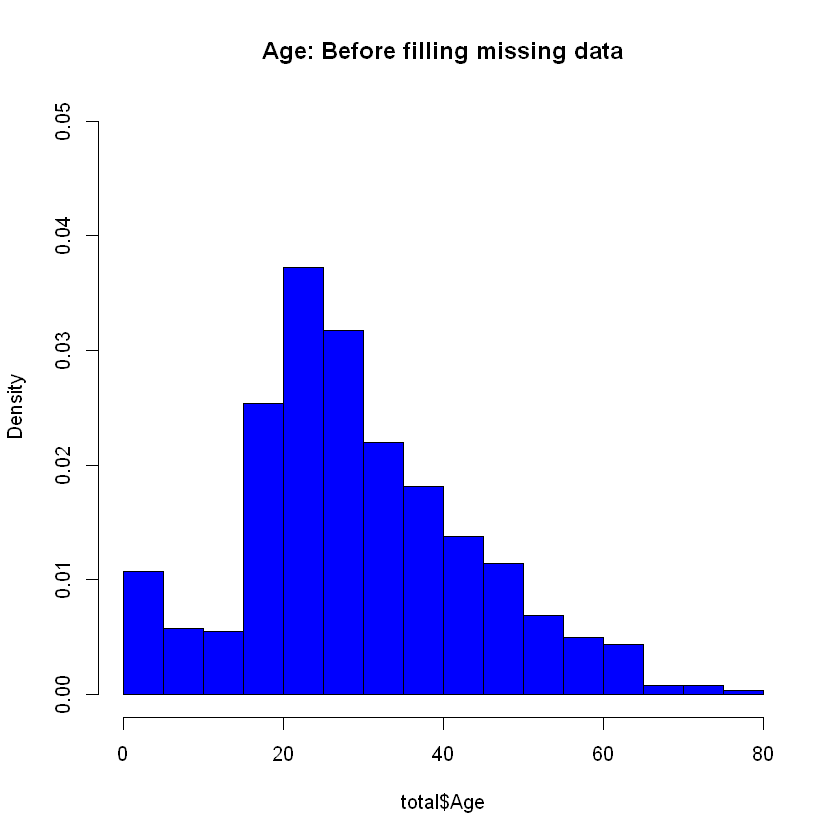

In [26]:
hist(total$Age, freq=F, main='Age: Before filling missing data', col='blue', ylim=c(0,0.05))

In [27]:
library(rpart)
#fill unknown Age by predicting using decision tree
Agefit <- rpart(Age ~ Pclass + Sex + SibSp + Parch + Fare + Embarked + Title + FamilySize, 
                data=total[!is.na(total$Age),], 
                method="anova")
total$Age[is.na(total$Age)] <- predict(Agefit, total[is.na(total$Age),])

In [28]:
summary(total$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.17   22.00   28.86   29.70   36.50   80.00 

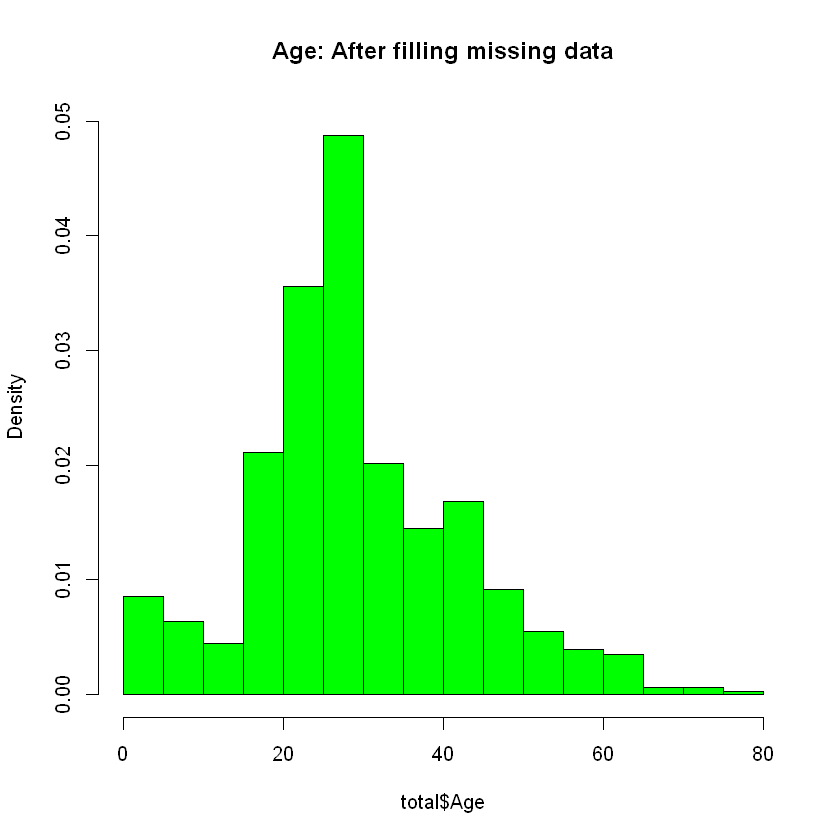

In [29]:
hist(total$Age, freq=F, main='Age: After filling missing data', col='green', ylim=c(0,0.05))

In [30]:
# Predict
set.seed(101)
train <- total[1:891,]
test <- total[892:1309,]

In [31]:
library(party)

Warning message:
"package 'party' was built under R version 3.3.3"Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.3.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.3.3"

In [32]:
#Fit model with cforest, a forest of conditional inference trees
fit <- cforest(as.factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + FamilySize + FamilyID, 
               data = train, 
               controls=cforest_unbiased(ntree=2000, mtry=3))

In [33]:
Prediction <- predict(fit, test, OOB=TRUE, type = "response")

In [34]:
submit <- data.frame(PassengerId = test$PassengerId, Survived = Prediction)
write.csv(submit, file = "KaggleCforest.csv", row.names = FALSE)
#0.81340

In [35]:
# Let's try Random Forest, which only allows factors with up to 32 levels, but FamilyID has 61 levels
total$FamilyID2 <- total$FamilyID
total$FamilyID2 <- as.character(total$FamilyID2)
total$FamilyID2[total$FamilySize <= 3] <- 'Small'
total$FamilyID2 <- factor(total$FamilyID2)
table(total$FamilyID2)


    11Sage   4Allison   4Baclini    4Becker    4Carter      4Dean    4Herman 
        11          4          4          4          4          4          4 
 4Johnston   4Laroche      4West      5Ford   5Lefebre   5Palsson   5Ryerson 
         4          4          4          5          5          5          5 
  6Fortune    6Panula      6Rice     6Skoog 7Andersson   7Asplund   8Goodwin 
         6          6          6          6          9          7          8 
     Small 
      1194 

In [36]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [37]:
train <- total[1:891,]
test <- total[892:1309,]

In [38]:
fit <- randomForest(as.factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + FamilySize + FamilyID2, 
                    data=train, 
                    importance=TRUE, 
                    ntree=2000)

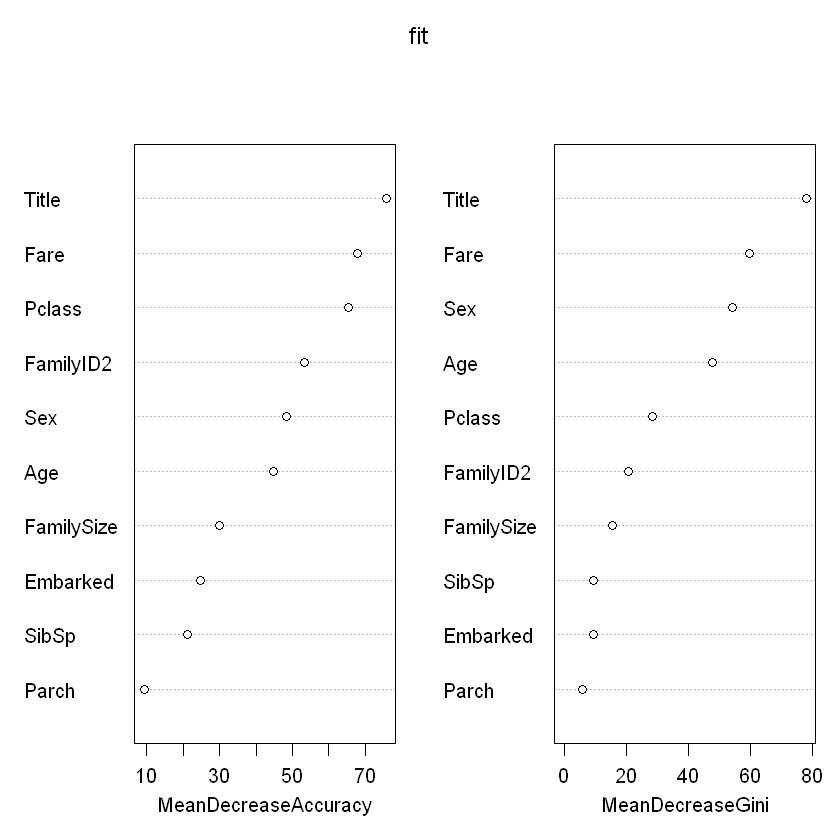

In [39]:
varImpPlot(fit)

In [40]:
Prediction <- predict(fit, test)
submit <- data.frame(PassengerId = test$PassengerId, Survived = Prediction)
write.csv(submit, file = "KaggleRforest.csv", row.names = FALSE)
#0.77033

In [43]:
# Try xgboost
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 3.3.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [44]:
str(total)

'data.frame':	1309 obs. of  17 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ Title      : Factor w/ 11 levels "Col","Dr","Lady",..: 7 8 5 8 7 7 7 4 8 8 ...
 $ FamilySize : num  2 2 1 2 1 1 1 5 3 2 ...
 $ S

In [46]:
xgb_total <- select(total, -PassengerId, -Survived, -Name, -Ticket, -Cabin, -Surname, -FamilyID2)

In [48]:
xgb_total$Pclass <- factor(xgb_total$Pclass)
xgb_total$SibSp <- as.numeric(xgb_total$SibSp)
xgb_total$Parch <- as.numeric(xgb_total$Parch)
str(xgb_total)

'data.frame':	1309 obs. of  10 variables:
 $ Pclass    : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex       : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age       : num  22 38 26 35 35 ...
 $ SibSp     : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch     : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare      : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked  : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ Title     : Factor w/ 11 levels "Col","Dr","Lady",..: 7 8 5 8 7 7 7 4 8 8 ...
 $ FamilySize: num  2 2 1 2 1 1 1 5 3 2 ...
 $ FamilyID  : Factor w/ 61 levels "11Sage","3Abbott",..: 61 61 61 61 61 61 61 52 19 61 ...


In [49]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice


In [50]:
dmy <- dummyVars(" ~ .", data = xgb_total, fullRank=T)
xgb_total <- data.frame(predict(dmy, newdata = xgb_total))

In [51]:
str(xgb_total)

'data.frame':	1309 obs. of  80 variables:
 $ Pclass.2              : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Pclass.3              : num  1 0 1 0 1 1 0 1 1 0 ...
 $ Sex.male              : num  1 0 0 0 1 1 1 1 0 0 ...
 $ Age                   : num  22 38 26 35 35 ...
 $ SibSp                 : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch                 : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare                  : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked.Q            : num  0 0 0 0 0 1 0 0 0 0 ...
 $ Embarked.S            : num  1 0 1 1 1 0 1 1 1 0 ...
 $ Title.Dr              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Title.Lady            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Title.Master          : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Title.Miss            : num  0 0 1 0 0 0 0 0 0 0 ...
 $ Title.Mlle            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Title.Mr              : num  1 0 0 0 1 1 1 0 0 0 ...
 $ Title.Mrs             : num  0 1 0 1 0 0 0 0 1 1 ...
 $ Title.Ms              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Ti

In [52]:
train <- xgb_total[1:891,]
label <- as.numeric(total[1:891,]$Survived)
test <- xgb_total[892:1309,]

In [55]:
dtrain <- xgb.DMatrix(data = data.matrix(train), label = label)
dtest <- data.matrix(test)

In [80]:
set.seed(101)
fit <- xgboost(dtrain, 
               objective="binary:logistic", 
               nrounds=50, 
               eta=0.001, 
               max_depth=20, 
               subsample=0.75, 
               colsample_bytree=0.8, 
               eval_metric="auc")

[1]	train-auc:0.896300 
[2]	train-auc:0.898548 
[3]	train-auc:0.900622 
[4]	train-auc:0.900111 
[5]	train-auc:0.899299 
[6]	train-auc:0.900079 
[7]	train-auc:0.900082 
[8]	train-auc:0.900793 
[9]	train-auc:0.901679 
[10]	train-auc:0.902683 
[11]	train-auc:0.902401 
[12]	train-auc:0.902707 
[13]	train-auc:0.902465 
[14]	train-auc:0.902233 
[15]	train-auc:0.902643 
[16]	train-auc:0.902153 
[17]	train-auc:0.902412 
[18]	train-auc:0.902380 
[19]	train-auc:0.902731 
[20]	train-auc:0.902603 
[21]	train-auc:0.902497 
[22]	train-auc:0.901165 
[23]	train-auc:0.901322 
[24]	train-auc:0.901456 
[25]	train-auc:0.901157 
[26]	train-auc:0.901200 
[27]	train-auc:0.901152 
[28]	train-auc:0.906007 
[29]	train-auc:0.905943 
[30]	train-auc:0.905937 
[31]	train-auc:0.905884 
[32]	train-auc:0.905964 
[33]	train-auc:0.906148 
[34]	train-auc:0.905991 
[35]	train-auc:0.905985 
[36]	train-auc:0.906270 
[37]	train-auc:0.906249 
[38]	train-auc:0.906206 
[39]	train-auc:0.906257 
[40]	train-auc:0.906348 
[41]	trai

In [81]:
importance <- xgb.importance(feature_names = names(test), model = fit)
importance

Feature,Gain,Cover,Frequency
Title.Mr,0.3481213631,0.149489837,0.024034960
Sex.male,0.1981334690,0.101019790,0.023306628
Fare,0.1489110505,0.313235305,0.422432629
Pclass.3,0.0965400567,0.084007805,0.039329934
Age,0.0661102554,0.153508992,0.255644574
FamilySize,0.0548691571,0.055558470,0.048798252
SibSp,0.0238342650,0.017383097,0.041514931
Title.Miss,0.0096518132,0.011744903,0.021121631
Title.Mrs,0.0094168654,0.011508502,0.013838310
Embarked.S,0.0090412552,0.021158486,0.037144938


In [84]:
pred <- predict(fit, dtest)
Prediction <- ifelse(pred > 0.5, 1, 0)

In [85]:
submit <- data.frame(PassengerId = total[892:1309,]$PassengerId, Survived = Prediction)
write.csv(submit, file = "KaggleXgb.csv", row.names = FALSE)
#0.79426